## 第10章 数据聚合与分组运算

## GroupBy


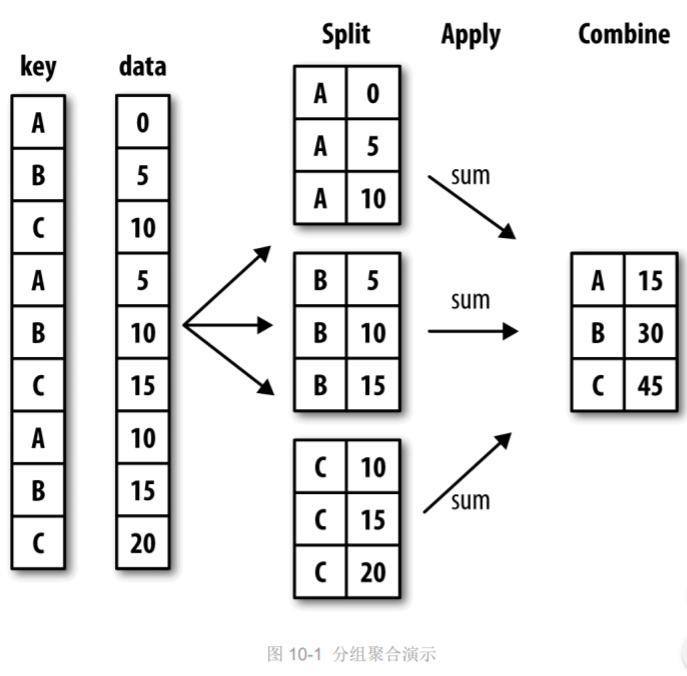

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'key1': ['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.392787,-1.517252
1,a,two,0.424827,-1.642267
2,b,one,2.138331,-0.517294
3,b,two,-1.371009,-1.540577
4,a,one,1.342683,0.402561


In [6]:
grouped = df['data1'].groupby(df['key1'])

In [7]:
grouped

In [8]:
grouped.mean()

key1
a    0.720099
b    0.383661
Name: data1, dtype: float64

In [9]:
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means

key1  key2
a     one     0.867735
      two     0.424827
b     one     2.138331
      two    -1.371009
Name: data1, dtype: float64

In [10]:
means.unstack()

key2,one,two
key1,,
a,0.867735,0.424827
b,2.138331,-1.371009


In [11]:
states = np.array(['Ohio','California','California','Ohio','Ohio'])
years = np.array([2005,2005,2006,2005,2006])
df['data1'].groupby([states,years]).mean()

California  2005    0.424827
            2006    2.138331
Ohio        2005   -0.489111
            2006    1.342683
Name: data1, dtype: float64

In [12]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.720099,-0.918986
b,0.383661,-1.028935


In [13]:
df.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one   0.867735 -0.557345
     two   0.424827 -1.642267
b    one   2.138331 -0.517294
     two  -1.371009 -1.540577

In [14]:
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

## 对分组进行迭代


In [15]:
for name,group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  0.392787 -1.517252
1    a  two  0.424827 -1.642267
4    a  one  1.342683  0.402561
b
  key1 key2     data1     data2
2    b  one  2.138331 -0.517294
3    b  two -1.371009 -1.540577


In [16]:
for (k1,k2), group in df.groupby(['key1','key2']):
    print((k1,k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  0.392787 -1.517252
4    a  one  1.342683  0.402561
('a', 'two')
  key1 key2     data1     data2
1    a  two  0.424827 -1.642267
('b', 'one')
  key1 key2     data1     data2
2    b  one  2.138331 -0.517294
('b', 'two')
  key1 key2     data1     data2
3    b  two -1.371009 -1.540577


In [18]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,key1,key2,data1,data2
2,b,one,2.138331,-0.517294
3,b,two,-1.371009,-1.540577


In [20]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [21]:
grouped = df.groupby(df.dtypes,axis = 1)

In [22]:
for dtype,group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0  0.392787 -1.517252
1  0.424827 -1.642267
2  2.138331 -0.517294
3 -1.371009 -1.540577
4  1.342683  0.402561
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


## 选取一列或列的子集
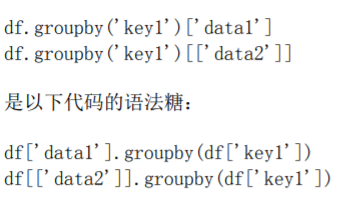

In [23]:
df.groupby(['key1','key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.557345
     two  -1.642267
b    one  -0.517294
     two  -1.540577

In [26]:
s_grouped = df.groupby(['key1','key2'])[['data2']]
s_grouped


In [27]:
s_grouped.mean()

data2
key1 key2          
a    one  -0.557345
     two  -1.642267
b    one  -0.517294
     two  -1.540577

## 通过字典或Series进行分组

In [28]:
people = pd.DataFrame(np.random.randn(5,5),
                      columns = ['a','b','c','d','e'],
                      index = ['Joe','Steve','Wes','Jim','Travis'])
people.iloc[2:3,[1,2]] = np.nan #Add a few NA values
people

,a,b,c,d,e
Joe,1.287234,-1.628175,-0.293199,-1.928773,2.002276
Steve,0.349550,0.112958,2.290214,-0.414287,0.773198
Wes,1.725623,NaN,NaN,1.243122,0.336187
Jim,-0.882870,0.334327,-0.821427,-0.962917,2.610425
Travis,-0.354642,-0.610428,-0.111449,1.042440,-1.539379


In [30]:
mapping = {'a':'red','b':'red','c':'blue','d':'blue','e':'red','f':'orange'}
by_column = people.groupby(mapping,axis =1)
by_column.sum()
#f 键没有参与分组

,blue,red
Joe,-2.221972,1.661335
Steve,1.875926,1.235706
Wes,1.243122,2.061810
Jim,-1.784344,2.061882
Travis,0.930991,-2.504449


In [31]:
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [33]:
people.groupby(map_series,axis = 1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


## 通过函数进行分组

In [35]:
people.groupby(len).sum()#根据名字长度len

,a,b,c,d,e
3,2.129988,-1.293849,-1.114626,-1.648569,4.948888
5,0.349550,0.112958,2.290214,-0.414287,0.773198
6,-0.354642,-0.610428,-0.111449,1.042440,-1.539379


In [36]:
key_list = ['one','one','one','two','two']
people.groupby([len,key_list]).min()

a         b         c         d         e
3 one  1.287234 -1.628175 -0.293199 -1.928773  0.336187
  two -0.882870  0.334327 -0.821427 -0.962917  2.610425
5 one  0.349550  0.112958  2.290214 -0.414287  0.773198
6 two -0.354642 -0.610428 -0.111449  1.042440 -1.539379

## 根据索引级别分组

In [42]:
columns = pd.MultiIndex.from_arrays([['US','US','US','JP','JP'],[1,3,5,1,3]],
                                    names = ['cty','tenor'])
hier_df = pd.DataFrame(np.random.randn(4,5),columns = columns)
hier_df



cty          US                            JP          
tenor         1         3         5         1         3
0     -1.298625 -0.555556 -1.565475 -0.282662  1.700399
1      0.091049  0.191916 -0.212774  0.195596 -2.053183
2     -0.057272 -1.635217 -1.338860  0.231116  0.211394
3      0.555985  0.898021 -0.835860  1.380131 -0.578575

In [46]:
hier_df.groupby(level='cty',axis = 1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## 数据聚合
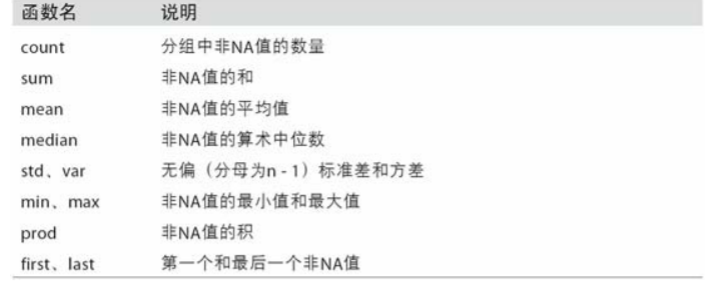

In [47]:
df

,key1,key2,data1,data2
0,a,one,0.392787,-1.517252
1,a,two,0.424827,-1.642267
2,b,one,2.138331,-0.517294
3,b,two,-1.371009,-1.540577
4,a,one,1.342683,0.402561


In [48]:
grouped = df.groupby('key1')

In [49]:
grouped['data1'].quantile(0.9)#计算样本分位数

key1
a    1.159112
b    1.787397
Name: data1, dtype: float64

In [51]:
def max_minux_min(arr):
    return arr.max() - arr.min()
grouped.agg(max_minux_min)#agg 使用自定义函数

,data1,data2
key1,,
a,0.949896,2.044828
b,3.509340,1.023283


In [52]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.720099  0.539412  0.392787  0.408807  0.424827  0.883755   
b      2.0  0.383661  2.481478 -1.371009 -0.493674  0.383661  1.260996   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.342683   3.0 -0.918986  1.146199 -1.642267 -1.579759 -1.517252   
b     2.138331   2.0 -1.028935  0.723570 -1.540577 -1.284756 -1.028935   

                          
           75%       max  
key1                      
a    -0.557345  0.402561  
b    -0.773114 -0.517294

## 面向列的多函数应用

In [58]:
fandango = pd.read_csv('fandango_scores.csv')

In [59]:
fandango.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [60]:
grouped = fandango.groupby(['IMDB'])

In [61]:
grouped.mean()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
IMDB,,,,,,,,,,,,,,,,,,,,
4.0,9.000000,20.000000,27.000000,2.500000,3.000000,2.700000,0.450000,1.000000,1.350000,1.250000,2.00,0.500000,1.000000,1.500000,1.500000,2.0,421.000000,39838.000000,6288.000000,0.300000
4.2,25.000000,42.000000,46.000000,3.200000,4.000000,3.900000,1.250000,2.100000,2.300000,1.600000,2.10,1.500000,2.000000,2.500000,1.500000,2.0,778.000000,179506.000000,34846.000000,0.100000
4.3,5.000000,36.000000,13.000000,2.400000,3.500000,3.500000,0.250000,1.800000,0.650000,1.200000,2.15,0.500000,2.000000,0.500000,1.000000,2.0,211.000000,15004.000000,3054.000000,0.000000
4.4,16.000000,27.000000,30.000000,7.000000,3.000000,2.900000,0.800000,1.350000,1.500000,3.500000,2.20,1.000000,1.500000,1.500000,3.500000,2.0,80.000000,5511.000000,1896.000000,0.100000
4.6,11.500000,28.000000,33.500000,5.450000,3.500000,3.250000,0.575000,1.400000,1.675000,2.725000,2.30,0.500000,1.500000,1.750000,2.750000,2.5,40.000000,10305.000000,1505.000000,0.250000
4.9,15.000000,31.000000,36.500000,4.050000,3.500000,3.350000,0.750000,1.550000,1.825000,2.025000,2.45,0.750000,1.750000,1.750000,2.000000,2.5,66.500000,15967.000000,1975.500000,0.150000
5.0,31.000000,24.000000,47.000000,3.700000,3.000000,2.800000,1.550000,1.200000,2.350000,1.850000,2.50,1.500000,1.000000,2.500000,2.000000,2.5,142.000000,21372.000000,2704.000000,0.200000
5.1,14.000000,28.000000,29.000000,3.400000,3.500000,3.000000,0.700000,1.400000,1.450000,1.700000,2.55,0.500000,1.500000,1.500000,1.500000,2.5,88.000000,19560.000000,1021.000000,0.500000
5.2,20.500000,42.000000,32.000000,4.850000,3.750000,3.600000,1.025000,2.100000,1.600000,2.425000,2.60,1.000000,2.000000,1.500000,2.500000,2.5,85.000000,18456.500000,4243.000000,0.150000


In [63]:
grouped.agg(['mean','max','sum'])

RottenTomatoes           RottenTomatoes_User          Metacritic      \
               mean  max  sum                mean max  sum       mean max   
IMDB                                                                        
4.0        9.000000    9    9           20.000000  20   20  27.000000  27   
4.2       25.000000   25   25           42.000000  42   42  46.000000  46   
4.3        5.000000    5    5           36.000000  36   36  13.000000  13   
4.4       16.000000   16   16           27.000000  27   27  30.000000  30   
4.6       11.500000   13   23           28.000000  35   56  33.500000  37   
4.9       15.000000   22   30           31.000000  37   62  36.500000  42   
5.0       31.000000   31   31           24.000000  24   24  47.000000  47   
5.1       14.000000   14   14           28.000000  28   28  29.000000  29   
5.2       20.500000   27   41           42.000000  61   84  32.000000  33   
5.4       20.250000   34   81           40.250000  84  161  35.250000  51   
5.5       16.400000   26   82           34.000000  40  170  33.600000  40   
5.6       35.500000   54   71           43.000000  54   86  39.500000  52   
5.7       17.000000   17   17           50.000000  50   50  25.000000  25   
5.8       17.000000   17   17           34.000000  34   34  39.000000  39   
5.9       46.000000   71  138           45.000000  49  135  51.333333  67   
6.0       65.500000   71  131           55.000000  60  110  64.500000  69   
6.1       42.000000   78  168           49.000000  55  196  44.250000  62   
6.2       64.000000   64   64           53.000000  53   53  54.000000  54   
6.3       43.444444   62  391           48.666667  64  438  47.222222  67   
6.4       49.166667   83  295           51.666667  61  310  53.166667  76   
6.5       57.750000   86  231           55.250000  64  221  55.750000  81   
6.6       50.777778   71  457           58.444444  68  526  51.666667  60   
6.7       62.571429   87  438           62.857143  74  440  61.857143  81   
6.8       89.000000   89   89           67.000000  67   67  78.000000  78   
6.9       70.428571   98  493           60.857143  70  426  66.285714  94   
7.0       58.000000   95  232           70.000000  81  280  59.250000  87   
7.1       74.142857   90  519           74.428571  87  521  63.285714  79   
7.2       75.400000   99  754           76.300000  83  763  66.900000  91   
7.3       78.600000   94  393           77.400000  82  387  66.800000  77   
7.4       75.375000   99  603           81.875000  86  655  67.875000  89   
7.5       84.333333   99  506           82.166667  89  493  71.500000  89   
7.6       85.666667   96  257           81.666667  86  245  69.000000  77   
7.7       96.750000  100  387           84.500000  87  338  83.750000  92   
7.8       83.444444  100  751           85.666667  90  771  69.777778  90   
7.9       92.000000   92  184           83.500000  89  167  86.000000  88   
8.0       97.000000   97   97           91.000000  91   91  85.000000  85   
8.1       90.000000   90   90           92.000000  92   92  73.000000  73   
8.2       93.250000   99  373           89.750000  92  359  81.000000  87   
8.3       97.000000   97   97           88.000000  88   88  89.000000  89   
8.4       93.000000   96  186           92.000000  94  184  77.500000  83   
8.6       98.000000   98   98           90.000000  90   90  94.000000  94   

          Metacritic_User  ... Metacritic_user_vote_count  \
      sum            mean  ...                        sum   
IMDB                       ...                              
4.0    27        2.500000  ...                        421   
4.2    46        3.200000  ...                        778   
4.3    13        2.400000  ...                        211   
4.4    30        7.000000  ...                         80   
4.6    67        5.450000  ...                         80   
4.9    73        4.050000  ...                        133   
5.0    47        3.700000  ...                        142   
5.1   

In [64]:
grouped.agg([('foo','mean'),('bar',np.std)])

RottenTomatoes            RottenTomatoes_User            Metacritic  \
                foo        bar                 foo        bar        foo   
IMDB                                                                       
4.0        9.000000        NaN           20.000000        NaN  27.000000   
4.2       25.000000        NaN           42.000000        NaN  46.000000   
4.3        5.000000        NaN           36.000000        NaN  13.000000   
4.4       16.000000        NaN           27.000000        NaN  30.000000   
4.6       11.500000   2.121320           28.000000   9.899495  33.500000   
4.9       15.000000   9.899495           31.000000   8.485281  36.500000   
5.0       31.000000        NaN           24.000000        NaN  47.000000   
5.1       14.000000        NaN           28.000000        NaN  29.000000   
5.2       20.500000   9.192388           42.000000  26.870058  32.000000   
5.4       20.250000   9.742518           40.250000  29.181901  35.250000   
5.5       16.400000   6.107373           34.000000   3.937004  33.600000   
5.6       35.500000  26.162951           43.000000  15.556349  39.500000   
5.7       17.000000        NaN           50.000000        NaN  25.000000   
5.8       17.000000        NaN           34.000000        NaN  39.000000   
5.9       46.000000  34.219877           45.000000   5.291503  51.333333   
6.0       65.500000   7.778175           55.000000   7.071068  64.500000   
6.1       42.000000  29.743347           49.000000   4.082483  44.250000   
6.2       64.000000        NaN           53.000000        NaN  54.000000   
6.3       43.444444  17.993826           48.666667  10.099505  47.222222   
6.4       49.166667  26.232931           51.666667   7.339391  53.166667   
6.5       57.750000  18.909874           55.250000   7.365460  55.750000   
6.6       50.777778  14.872607           58.444444   6.616478  51.666667   
6.7       62.571429  21.892595           62.857143   8.173709  61.857143   
6.8       89.000000        NaN           67.000000        NaN  78.000000   
6.9       70.428571  29.222464           60.857143   6.039552  66.285714   
7.0       58.000000  30.973107           70.000000  10.000000  59.250000   
7.1       74.142857  19.995238           74.428571   6.972736  63.285714   
7.2       75.400000  24.617970           76.300000   6.498718  66.900000   
7.3       78.600000  16.682326           77.400000   5.594640  66.800000   
7.4       75.375000  27.260319           81.875000   2.997022  67.875000   
7.5       84.333333  13.170674           82.166667   6.911343  71.500000   
7.6       85.666667  15.373137           81.666667   3.785939  69.000000   
7.7       96.750000   3.593976           84.500000   3.696846  83.750000   
7.8       83.444444  12.600705           85.666667   3.708099  69.777778   
7.9       92.000000   0.000000           83.500000   7.778175  86.000000   
8.0       97.000000        NaN           91.000000        NaN  85.000000   
8.1       90.000000        NaN           92.000000        NaN  73.000000   
8.2       93.250000   8.261356           89.750000   2.872281  81.000000   
8.3       97.000000        NaN           88.000000        NaN  89.000000   
8.4       93.000000   4.242641           92.000000   2.828427  77.500000   
8.6       98.000000        NaN           90.000000        NaN  94.000000   

                Metacritic_User           Fandango_Stars            ...  \
            bar             foo       bar            foo       bar  ...   
IMDB                                                                ...   
4.0         NaN        2.500000       NaN       3.000000       NaN  ...   
4.2         NaN        3.200000       NaN       4.000000       NaN  ...   
4.3         NaN        2.400000       NaN       3.500000       NaN  ...   
4.4         NaN        7.000000       NaN       3.000000       NaN  ...   
4.6    4.949747        5.450000  0.070711       3.500000  0.707107  ...   
4.9    7.778175        4.050000  0.494975       3.500000  0.

In [67]:
functions = ['count','mean','max']
result = grouped['Metacritic','RottenTomatoes'].agg(functions)
result

Metacritic                RottenTomatoes                
          count       mean max          count       mean  max
IMDB                                                         
4.0           1  27.000000  27              1   9.000000    9
4.2           1  46.000000  46              1  25.000000   25
4.3           1  13.000000  13              1   5.000000    5
4.4           1  30.000000  30              1  16.000000   16
4.6           2  33.500000  37              2  11.500000   13
4.9           2  36.500000  42              2  15.000000   22
5.0           1  47.000000  47              1  31.000000   31
5.1           1  29.000000  29              1  14.000000   14
5.2           2  32.000000  33              2  20.500000   27
5.4           4  35.250000  51              4  20.250000   34
5.5           5  33.600000  40              5  16.400000   26
5.6           2  39.500000  52              2  35.500000   54
5.7           1  25.000000  25              1  17.000000   17
5.8           1  39.000000  39              1  17.000000   17
5.9           3  51.333333  67              3  46.000000   71
6.0           2  64.500000  69              2  65.500000   71
6.1           4  44.250000  62              4  42.000000   78
6.2           1  54.000000  54              1  64.000000   64
6.3           9  47.222222  67              9  43.444444   62
6.4           6  53.166667  76              6  49.166667   83
6.5           4  55.750000  81              4  57.750000   86
6.6           9  51.666667  60              9  50.777778   71
6.7           7  61.857143  81              7  62.571429   87
6.8           1  78.000000  78              1  89.000000   89
6.9           7  66.285714  94              7  70.428571   98
7.0           4  59.250000  87              4  58.000000   95
7.1           7  63.285714  79              7  74.142857   90
7.2          10  66.900000  91             10  75.400000   99
7.3           5  66.800000  77              5  78.600000   94
7.4           8  67.875000  89              8  75.375000   99
7.5           6  71.500000  89              6  84.333333   99
7.6           3  69.000000  77              3  85.666667   96
7.7           4  83.750000  92              4  96.750000  100
7.8           9  69.777778  90              9  83.444444  100
7.9           2  86.000000  88              2  92.000000   92
8.0           1  85.000000  85              1  97.000000   97
8.1           1  73.000000  73              1  90.000000   90
8.2           4  81.000000  87              4  93.250000   99
8.3           1  89.000000  89              1  97.000000   97
8.4           2  77.500000  83              2  93.000000   96
8.6           1  94.000000  94              1  98.000000   98

In [68]:
grouped.agg({'Metacritic':['min','max','mean','std'],
             'RottenTomatoes':'sum'})

Metacritic                           RottenTomatoes
            min max       mean        std            sum
IMDB                                                    
4.0          27  27  27.000000        NaN              9
4.2          46  46  46.000000        NaN             25
4.3          13  13  13.000000        NaN              5
4.4          30  30  30.000000        NaN             16
4.6          30  37  33.500000   4.949747             23
4.9          31  42  36.500000   7.778175             30
5.0          47  47  47.000000        NaN             31
5.1          29  29  29.000000        NaN             14
5.2          31  33  32.000000   1.414214             41
5.4          22  51  35.250000  12.038134             81
5.5          27  40  33.600000   6.024948             82
5.6          27  52  39.500000  17.677670             71
5.7          25  25  25.000000        NaN             17
5.8          39  39  39.000000        NaN             17
5.9          28  67  51.333333  20.599353            138
6.0          60  69  64.500000   6.363961            131
6.1          26  62  44.250000  17.017148            168
6.2          54  54  54.000000        NaN             64
6.3          24  67  47.222222  13.179319            391
6.4          41  76  53.166667  13.526517            295
6.5          43  81  55.750000  17.114808            231
6.6          34  60  51.666667   8.291562            457
6.7          35  81  61.857143  15.170460            438
6.8          78  78  78.000000        NaN             89
6.9          38  94  66.285714  19.180844            493
7.0          41  87  59.250000  20.500000            232
7.1          38  79  63.285714  13.634690            519
7.2          33  91  66.900000  19.237983            754
7.3          51  77  66.800000  11.278298            393
7.4          30  89  67.875000  19.584524            603
7.5          59  89  71.500000  11.184811            506
7.6          55  77  69.000000  12.165525            257
7.7          78  92  83.750000   5.909033            387
7.8          57  90  69.777778  10.603982            751
7.9          84  88  86.000000   2.828427            184
8.0          85  85  85.000000        NaN             97
8.1          73  73  73.000000        NaN             90
8.2          74  87  81.000000   6.480741            373
8.3          89  89  89.000000        NaN             97
8.4          72  83  77.500000   7.778175            186
8.6          94  94  94.000000        NaN             98

## apply 拆分-应用-合并

In [80]:
tips = pd.read_csv('tips.csv')
tips['tip_pct']=tips['tip']/tips['total_bill']
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [81]:
def top(df,n = 5,column = 'tip_pct'):
    return df.sort_values(by = column)[-n:]

In [82]:
top(tips,n =6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [83]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [84]:
tips.groupby(['smoker','day']).apply(top,n = 1,
                                     column = 'total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [85]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [86]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [87]:
tips.groupby('smoker',group_keys = False).apply(top)#禁止分组建

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [93]:
f = lambda x: x.describe()
grouped.apply(f)

RottenTomatoes  RottenTomatoes_User  Metacritic  Metacritic_User  \
IMDB                                                                           
4.0  count        1.000000             1.000000    1.000000         1.000000   
     mean         9.000000            20.000000   27.000000         2.500000   
     std               NaN                  NaN         NaN              NaN   
     min          9.000000            20.000000   27.000000         2.500000   
     25%          9.000000            20.000000   27.000000         2.500000   
     50%          9.000000            20.000000   27.000000         2.500000   
     75%          9.000000            20.000000   27.000000         2.500000   
     max          9.000000            20.000000   27.000000         2.500000   
4.2  count        1.000000             1.000000    1.000000         1.000000   
     mean        25.000000            42.000000   46.000000         3.200000   
     std               NaN                  NaN         NaN              NaN   
     min         25.000000            42.000000   46.000000         3.200000   
     25%         25.000000            42.000000   46.000000         3.200000   
     50%         25.000000            42.000000   46.000000         3.200000   
     75%         25.000000            42.000000   46.000000         3.200000   
     max         25.000000            42.000000   46.000000         3.200000   
4.3  count        1.000000             1.000000    1.000000         1.000000   
     mean         5.000000            36.000000   13.000000         2.400000   
     std               NaN                  NaN         NaN              NaN   
     min          5.000000            36.000000   13.000000         2.400000   
     25%          5.000000            36.000000   13.000000         2.400000   
     50%          5.000000            36.000000   13.000000         2.400000   
     75%          5.000000            36.000000   13.000000         2.400000   
     max          5.000000            36.000000   13.000000         2.400000   
4.4  count        1.000000             1.000000    1.000000         1.000000   
     mean        16.000000            27.000000   30.000000         7.000000   
     std               NaN                  NaN         NaN              NaN   
     min         16.000000            27.000000   30.000000         7.000000   
     25%         16.000000            27.000000   30.000000         7.000000   
     50%         16.000000            27.000000   30.000000         7.000000   
...                    ...                  ...         ...              ...   
8.2  std          8.261356             2.872281    6.480741         0.619139   
     min         81.000000            86.000000   74.000000         8.200000   
     25%         92.250000            88.250000   76.250000         8.350000   
     50%         96.500000            90.500000   81.500000         8.600000   
     75%         97.500000            92.000000   86.250000         9.000000   
     max         99.000000            92.000000   87.000000         9.600000   
8.3  count        1.000000             1.000000    1.000000         1.000000   
     mean        97.000000            88.000000   89.000000         8.700000   
     std               NaN                  NaN         NaN              NaN   
     min         97.000000            88.000000   89.000000         8.700000   
     25%         97.000000            88.000000   89.000000         8.700000   
     50%         97.000000            88.000000   89.000000         8.700000   
     75%         97.000000            88.000000   89.000000         8.700000   
     max         97.000000            88.000000   89.000000         8.700000   
8.4  count        2.000000             2.000000    2.000000         2.000000   
     mean        93.000000            92.000000   77.500000         7.550000   
     std          4.242641             2.828427    7.778175         0.353553   
     min    

In [89]:
frame = pd.DataFrame({'data1':np.random.randn(1000),
                     'data2':np.random.randn(1000)})

In [90]:
quartiles = pd.cut(frame.data1,4)

In [91]:
quartiles[:10]

0      (0.232, 1.831]
1      (0.232, 1.831]
2     (-1.368, 0.232]
3     (-1.368, 0.232]
4     (-1.368, 0.232]
5     (-1.368, 0.232]
6     (-1.368, 0.232]
7     (-1.368, 0.232]
8    (-2.974, -1.368]
9     (-1.368, 0.232]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.974, -1.368] < (-1.368, 0.232] < (0.232, 1.831] < (1.831, 3.431]]

In [94]:
def get_stats(group):
    return {'min':group.min(),
            'max':group.max(),
            'count':group.count(),
            'mean':group.mean()}
grouped = frame.data2.groupby(quartiles)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-2.974, -1.368]",82.0,2.421244,-0.033583,-2.322550
"(-1.368, 0.232]",512.0,3.157896,-0.020392,-2.946318
"(0.232, 1.831]",366.0,3.034448,-0.011176,-3.401096
"(1.831, 3.431]",40.0,1.866694,-0.069533,-1.959120


In [96]:
#返回分位数编号
grouping = pd.qcut(frame.data1,10,labels = False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,2.421244,-0.015661,-2.904758
1,100.0,2.249816,-0.028270,-2.620409
2,100.0,3.157896,0.020297,-2.946318
3,100.0,2.367760,-0.026040,-2.674755
4,100.0,2.496076,-0.217331,-2.502654
5,100.0,2.638052,0.126631,-2.379748
6,100.0,2.720818,0.001383,-3.049824
7,100.0,1.955610,-0.057556,-2.985809
8,100.0,3.034448,0.080946,-3.401096


## 用特定于分组的值填充缺失值

In [97]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1   -1.315194
2         NaN
3    1.345027
4         NaN
5   -0.855721
dtype: float64

In [98]:
s.fillna(s.mean())

0   -0.275296
1   -1.315194
2   -0.275296
3    1.345027
4   -0.275296
5   -0.855721
dtype: float64

In [99]:
states = ['Ohio','New York', 'Vermont', 'Florida','Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8),index = states)
data

Ohio          0.388443
New York     -1.032275
Vermont       0.204495
Florida      -1.470374
Oregon       -0.577627
Nevada        0.786219
California   -1.282386
Idaho        -1.101782
dtype: float64

In [100]:
data[['Vermont','Nevada','Idaho']] = np.nan
data

Ohio          0.388443
New York     -1.032275
Vermont            NaN
Florida      -1.470374
Oregon       -0.577627
Nevada             NaN
California   -1.282386
Idaho              NaN
dtype: float64

In [101]:
data.groupby(group_key).mean()

East   -0.704735
West   -0.930007
dtype: float64

In [102]:
fill_mean = lambda g:g.fillna(g.mean())

In [104]:
data.groupby(group_key).apply(fill_mean)

Ohio          0.388443
New York     -1.032275
Vermont      -0.704735
Florida      -1.470374
Oregon       -0.577627
Nevada       -0.930007
California   -1.282386
Idaho        -0.930007
dtype: float64

## 随机采样与排列

In [105]:
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)

In [106]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [107]:
def draw(deck,n=5):
    return deck.sample(n)

In [108]:
draw(deck) #随机抽5张牌

AC     1
QH    10
2D     2
4C     4
3C     3
dtype: int64

In [110]:
get_suit = lambda card:card[-1] # 每种花色随机抽两张
deck.groupby(get_suit).apply(draw,n=2)

C  5C     5
   3C     3
D  QD    10
   5D     5
H  AH     1
   7H     7
S  KS    10
   6S     6
dtype: int64

In [111]:
deck.groupby(get_suit,group_keys = False).apply(draw,n = 2)

3C      3
7C      7
3D      3
8D      8
3H      3
4H      4
10S    10
AS      1
dtype: int64

## 加权平均数和相关系数

In [112]:
df = pd.DataFrame({'category':['a','a','a','a','b','b','b','b'],
                   'data':np.random.randn(8),
                   'weights':np.random.rand(8)})
df

,category,data,weights
0,a,0.185208,0.949138
1,a,0.323650,0.485288
2,a,-0.808825,0.081511
3,a,-0.532488,0.972349
4,b,1.128521,0.701979
5,b,1.487570,0.477941
6,b,2.108859,0.198539
7,b,-0.390106,0.655094


In [114]:
grouped = df.groupby('category')

In [115]:
get_wavg = lambda g:np.average(g['data'],weights = g['weights'])
grouped.apply(get_wavg)

category
a   -0.100809
b    0.819406
dtype: float64

In [121]:
grouped.apply(lambda g:np.average(g['data'],weights = g['weights']))

category
a   -0.100809
b    0.819406
dtype: float64

In [123]:
close_px = pd.read_csv('pydata-book-2nd-edition/examples/stock_px_2.csv',parse_dates = True,index_col = 0)

In [124]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB


In [125]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [126]:
spx_corr = lambda x :x.corrwith(x['SPX'])

In [127]:
rets = close_px.pct_change().dropna()

In [128]:
get_year = lambda x :x.year

In [129]:
by_year = rets.groupby(get_year)

In [130]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [131]:
by_year.apply(lambda g:g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

## 组级别的线性回归

In [ ]:
import statsmodels.api as sm
def regress(data,yvar,xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y,X).fit()
    return result.params
by_year.apply(regress,'AAPL',['SPX'])

## 透视表和交叉表

In [135]:
tips.pivot_table(index = ['day','smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [136]:
tips.pivot_table(['tip_pct','size'],index = ['time','day'],columns = 'smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [137]:
tips.pivot_table(['tip_pct','size'],index = ['time','day'],columns = 'smoker',margins= True) 
# all 默认为 均值

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [140]:
tips.pivot_table(['tip_pct','size'],index = ['time','day'],columns = 'smoker',aggfunc=len,margins= True) 
# all 为 len

size            tip_pct             
smoker          No   Yes  All      No   Yes    All
time   day                                        
Dinner Fri     3.0   9.0   12     3.0   9.0   12.0
       Sat    45.0  42.0   87    45.0  42.0   87.0
       Sun    57.0  19.0   76    57.0  19.0   76.0
       Thur    1.0   NaN    1     1.0   NaN    1.0
Lunch  Fri     1.0   6.0    7     1.0   6.0    7.0
       Thur   44.0  17.0   61    44.0  17.0   61.0
All          151.0  93.0  244   151.0  93.0  244.0

In [142]:
tips.pivot_table(['tip_pct','size'],index = ['time','day'],columns = 'smoker',
                 aggfunc=len,margins= True,fill_value=0) 
## NA 0填充

size          tip_pct           
smoker        No Yes  All      No Yes    All
time   day                                  
Dinner Fri     3   9   12       3   9   12.0
       Sat    45  42   87      45  42   87.0
       Sun    57  19   76      57  19   76.0
       Thur    1   0    1       1   0    1.0
Lunch  Fri     1   6    7       1   6    7.0
       Thur   44  17   61      44  17   61.0
All          151  93  244     151  93  244.0

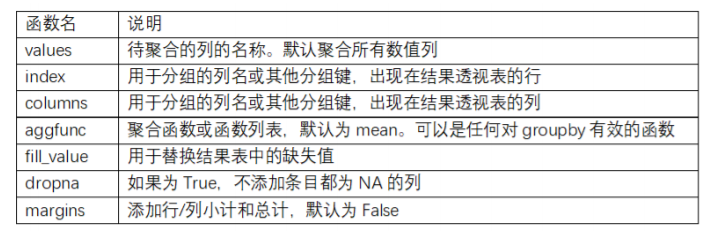

## 交叉表

In [148]:
pd.crosstab([tips.time,tips.day],tips.smoker,margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244